# IBAN Recognition

In [195]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

# This is needed to display the images.
%matplotlib inline

from utils import label_map_util
from utils import visualization_utils as vis_util

In [196]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = 'C:/Users/afarukdemir/Desktop/a1/digit.pb/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'C:/Users/afarukdemir/Desktop/a1/tims/label_map.pbtxt'

IMAGE_SIZE = (12, 8)

In [197]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

IBAN : TR 712346699400000000824401


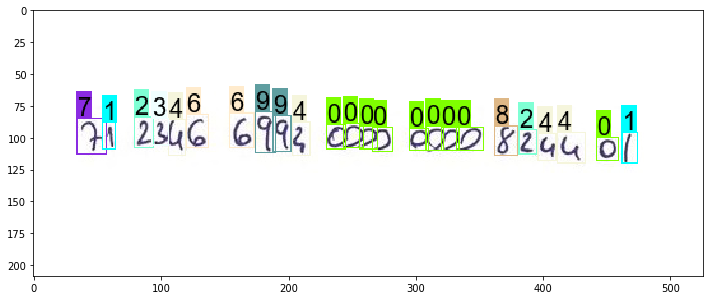

In [198]:
import cv2
# Initialize hitlist
hitf = open("hitlist.csv",'w')
hitf.write('image,class,score,bb0,bb1,bb2,bb3\n')
hitlim = 0.5

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        
        image = Image.open('C:/Users/afarukdemir/Desktop/a1/tims/1.jpg')

          # the array based representation of the image will be used later in order to prepare the
          # result image with boxes and labels on it.
        image_np = load_image_into_numpy_array(image)
          # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
          # Actual detection.
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})

          # Write the results to hitlist - one line per hit over the 0.5
        nprehit = scores.shape[1] # 2nd array dimension
        for j in range(nprehit):
            classid = int(classes[0][j])
            classname = category_index[classid]["name"]
            score = scores[0][j]
            if (score>=hitlim):
                sscore = str(score)
                bbox = boxes[0][j]
                b0 = str(bbox[0])
                b1 = str(bbox[1])
                b2 = str(bbox[2])
                b3 = str(bbox[3])
                line = ",".join([fname,classname,sscore,b0,b1,b2,b3])
                hitf.write(line+"\n")

          # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=1)
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(image_np)                      
        cv2.imwrite('C:/Users/afarukdemir/Desktop/a1/tims/1result.jpg',image_np)
# close hitlist
hitf.flush()
hitf.close()

import pandas as pd
df=pd.read_csv('C:/Users/afarukdemir/Desktop/a1/models/research/object_detection/hitlist.csv')
df=df.drop(['image', 'score', 'bb0', 'bb2', 'bb3'], axis=1)
df=df.sort_values(by=['bb1'])
df['class']=df['class'].astype(str)

rakam=pd.Series(df['class'])
rakam=rakam.str.cat(others=None, sep=None, na_rep=None, join=None)
print ('IBAN : TR',rakam)